In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix

In [49]:
file_path = (r'D:\AI in Enterprise System\Lab-2\breast+cancer+wisconsin+diagnostic (1)\wdbc.data')
file_path

'D:\\AI in Enterprise System\\Lab-2\\breast+cancer+wisconsin+diagnostic (1)\\wdbc.data'

In [50]:
df = pd.read_csv(file_path)

df = df.set_axis(['ID','Diagnosis','radius1','texture1','perimeter1','area1','smoothness1',
            'compactness1', 'concavity1', 'concave_points1', 'symmetry1', 'fractal_dimension1',
            'radius2', 'texture2', 'perimeter2', 'area2', 'smoothness2', 'compactness2', 'concavity2',
            'concave_points2', 'symmetry2', 'fractal_dimesion2', 'radius3',
            'texture3', 'perimeter3', 'area3', 'smoothness3', 'compactness3', 'concavity3', 'concave_points3',
            'symmetry3', 'fractal_dimension3'], axis='columns')

In [51]:
df.head(5)

,ID,Diagnosis,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
1,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
2,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
3,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
4,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568 entries, 0 to 567
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  568 non-null    int64  
 1   Diagnosis           568 non-null    object 
 2   radius1             568 non-null    float64
 3   texture1            568 non-null    float64
 4   perimeter1          568 non-null    float64
 5   area1               568 non-null    float64
 6   smoothness1         568 non-null    float64
 7   compactness1        568 non-null    float64
 8   concavity1          568 non-null    float64
 9   concave_points1     568 non-null    float64
 10  symmetry1           568 non-null    float64
 11  fractal_dimension1  568 non-null    float64
 12  radius2             568 non-null    float64
 13  texture2            568 non-null    float64
 14  perimeter2          568 non-null    float64
 15  area2               568 non-null    float64
 16  smoothne

In [53]:
df.describe() 

,ID,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
count,5.680000e+02,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,...,568.00000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000
mean,3.042382e+07,14.120491,19.305335,91.914754,654.279754,0.096321,0.104036,0.088427,0.048746,0.181055,...,16.25315,25.691919,107.125053,878.578873,0.132316,0.253541,0.271414,0.114341,0.289776,0.083884
std,1.251246e+08,3.523416,4.288506,24.285848,351.923751,0.014046,0.052355,0.079294,0.038617,0.027319,...,4.82232,6.141662,33.474687,567.846267,0.022818,0.156523,0.207989,0.065484,0.061508,0.018017
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.93000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692225e+05,11.697500,16.177500,75.135000,420.175000,0.086290,0.064815,0.029540,0.020310,0.161900,...,13.01000,21.095000,84.102500,514.975000,0.116600,0.146900,0.114475,0.064730,0.250350,0.071412
50%,9.061570e+05,13.355000,18.855000,86.210000,548.750000,0.095865,0.092525,0.061400,0.033455,0.179200,...,14.96500,25.425000,97.655000,685.550000,0.131300,0.211850,0.226550,0.099840,0.282050,0.080015
75%,8.825022e+06,15.780000,21.802500,103.875000,782.625000,0.105300,0.130400,0.129650,0.073730,0.195625,...,18.76750,29.757500,125.175000,1073.500000,0.146000,0.337600,0.381400,0.161325,0.317675,0.092065
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.04000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [54]:
df.dtypes

ID                      int64
Diagnosis              object
radius1               float64
texture1              float64
perimeter1            float64
area1                 float64
smoothness1           float64
compactness1          float64
concavity1            float64
concave_points1       float64
symmetry1             float64
fractal_dimension1    float64
radius2               float64
texture2              float64
perimeter2            float64
area2                 float64
smoothness2           float64
compactness2          float64
concavity2            float64
concave_points2       float64
symmetry2             float64
fractal_dimesion2     float64
radius3               float64
texture3              float64
perimeter3            float64
area3                 float64
smoothness3           float64
compactness3          float64
concavity3            float64
concave_points3       float64
symmetry3             float64
fractal_dimension3    float64
dtype: object

In [55]:
df.isnull().sum()

ID                    0
Diagnosis             0
radius1               0
texture1              0
perimeter1            0
area1                 0
smoothness1           0
compactness1          0
concavity1            0
concave_points1       0
symmetry1             0
fractal_dimension1    0
radius2               0
texture2              0
perimeter2            0
area2                 0
smoothness2           0
compactness2          0
concavity2            0
concave_points2       0
symmetry2             0
fractal_dimesion2     0
radius3               0
texture3              0
perimeter3            0
area3                 0
smoothness3           0
compactness3          0
concavity3            0
concave_points3       0
symmetry3             0
fractal_dimension3    0
dtype: int64

In [56]:
df.duplicated().sum()

0

In [57]:
df = df.replace({'M': 0,
           'B': 1})

<Axes: >

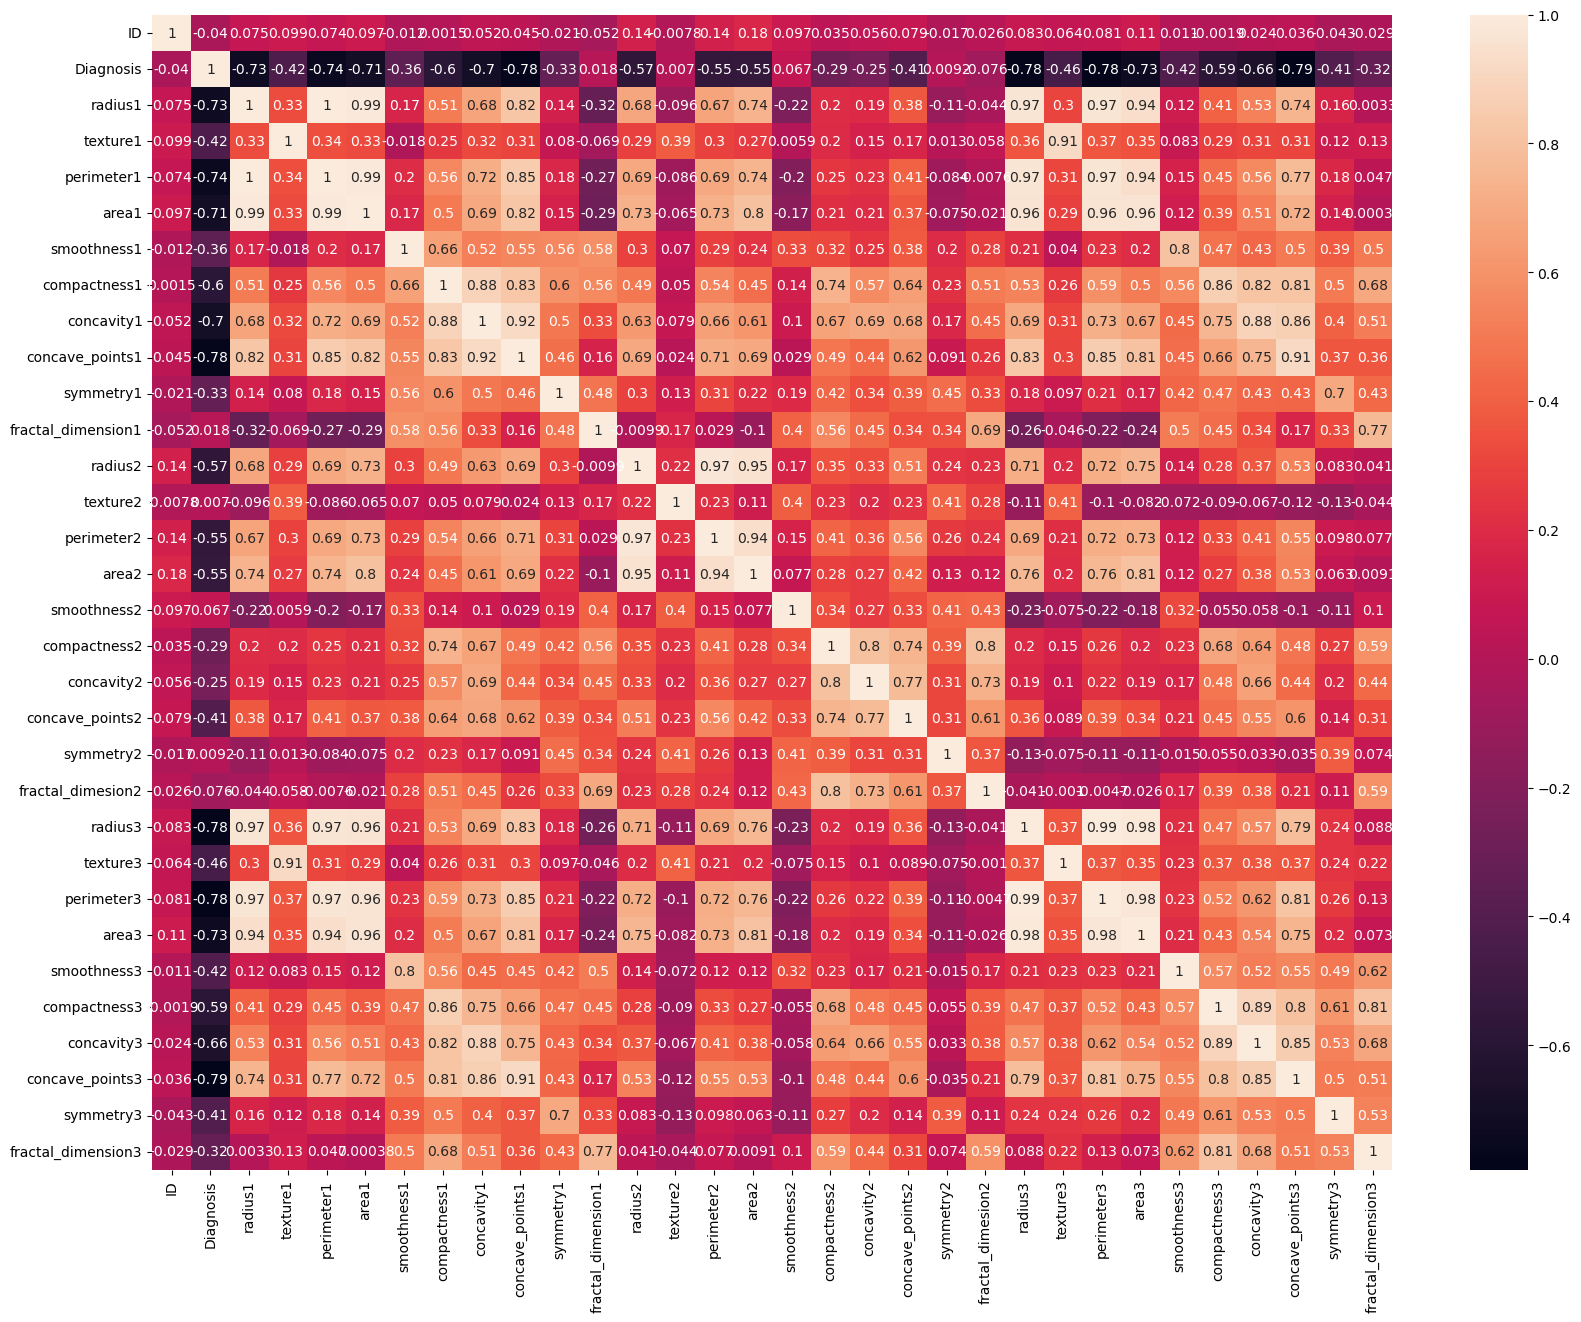

In [58]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), annot=True)

In [59]:
cor = df.corr()

In [60]:
df = df.drop(['ID'], axis=1)

In [61]:
df.Diagnosis.value_counts()

Diagnosis
1    357
0    211
Name: count, dtype: int64

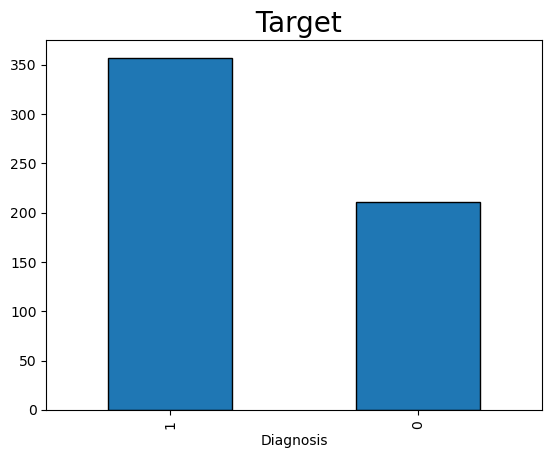

In [62]:
df['Diagnosis'].value_counts().plot(kind='bar',edgecolor='black')
plt.title(" Target",fontsize=20)
plt.show()


In [65]:
# Splitting data
x= df.drop('Diagnosis',axis=1)
y= df['Diagnosis']

In [68]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30,random_state=101)

In [69]:
s= StandardScaler()
x_train = s.fit_transform(x_train)
x_test = s.fit_transform(x_test)

In [73]:
model = LogisticRegression()

In [76]:
model.fit(x_train,y_train)
pred = model.predict(x_test)

acc=accuracy_score(y_test,pred)

In [77]:
print(pred)

[0 1 1 1 1 1 1 0 1 1 0 1 1 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1
 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 1 0 1 1 1 0 1 1 1 0 1 0 0 0 1 0 1 0 1
 0 0 0 1 0 1 0 1 1 0 1 1 0 1 1 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 1 0 1 0 1 1 1
 1 0 1 1 0 1 1 0 0 1 0 1 0 1 1 1 1 0 0 0 0 1 0 1 1 1 1 0 0 0 1 1 1 0 1 0 1
 1 1 1 1 0 1 0 0 0 1 1 1 0 1 1 1 1 0 1 1 1 1 0]


In [78]:
print(acc)

0.9473684210526315
